<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Random Forests (RF) for classification with Python***

In this notebook, you will learn $\color{aquamarine}{\text{Random Forests (RF)}}$ for classification and Regression. $\color{aquamarine}{\text{Random Forests (RF)}}$ is similar to $\color{yellow}{\text{Bagging}}$ using multiple model versions and aggregating the ensemble of models to make a single prediction. $\color{aquamarine}{\text{RF}}$ uses an ensemble of tree's and introduces randomness into each tree by randomly selecting a subset of the features for each node to split on. This makes the predictions of each tree uncorrelated, improving results when the models are aggregated.

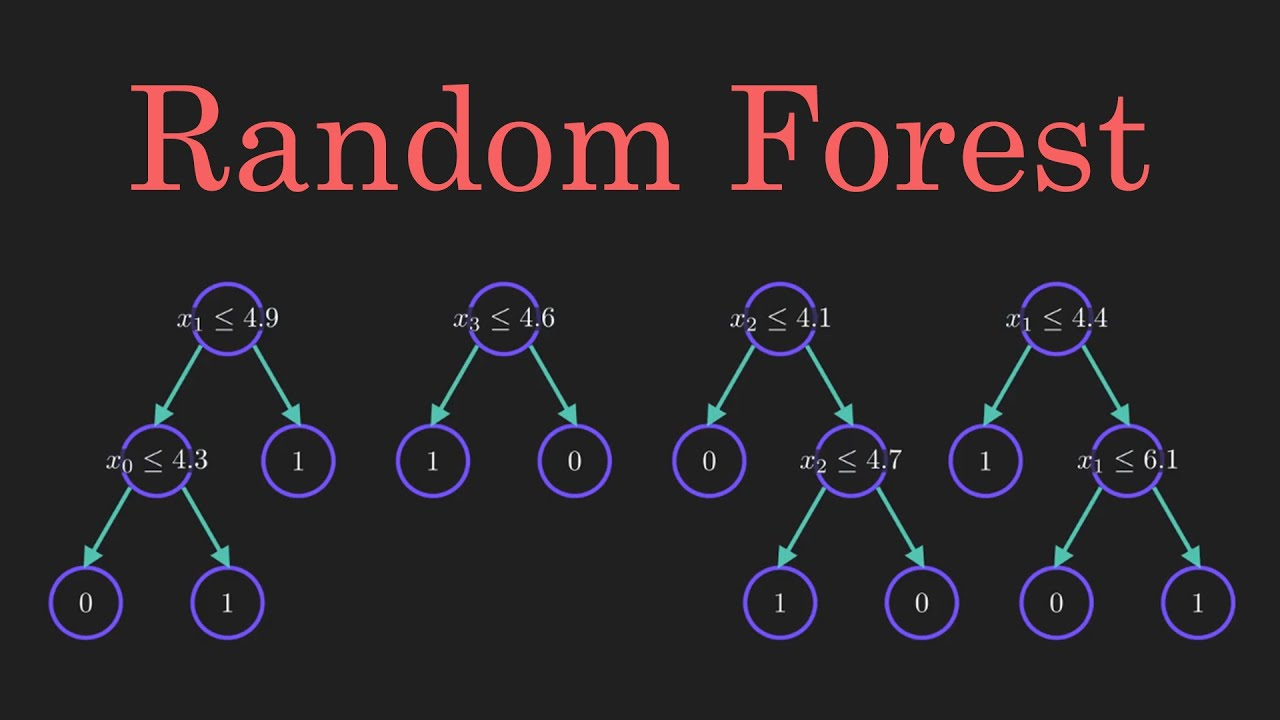

$ \ $

---

## ***Objectives***

In this lab we will illustrate the sampling process of $\color{aquamarine}{\text{RF}}$ to Bagging, then demonstrate how each predictor for $\color{aquamarine}{\text{Random Forest}}$ are not correlated. Finally, we will apply  $\color{aquamarine}{\text{Random Forest}}$ to several datasets using Grid-Search to find the optimum  Hyperparameters.
Thus after completing this lab you will be able to:

*   Understand the difference between Bagging and  $\color{aquamarine}{\text{Random Forest}}$.

*   Understand  that  $\color{aquamarine}{\text{Random Forest}}$ have less Correlation between predictors in their ensemble, improving accuracy.

*   Apply $\color{aquamarine}{\text{Random Forest}}$.

*   Understand Hyperparameters selection in  $\color{aquamarine}{\text{Random Forest}}$.

$ \ $

---

## ***Table of contents***

$ \ $

$(1)$ What's the difference between $\color{aquamarine}{\text{RF}}$ and Bagging.

$(2)$ Cancer Data Example.

$(3)$ Practice.

$ \ $ 

-----

## ***Import libraries***

$ \ $

$(1)$ Let's first import the required libraries.

In [ ]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm
from sklearn.utils import resample
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [ ]:
def zip(list_1, list_2):
  lista = []
  if len(list_1) == len(list_2):
    for i in range(len(list_1)):
      lista.append((list_1[i], list_2[i]))
  return lista

$ \ $

$(2)$ Ignore error warnings.

In [ ]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

$(3)$ This function will calculate the accuracy of the training and testing data given a model.


In [ ]:
def get_accuracy(X_train, X_test, y_train, y_test, model):

  # calculamos la precision del modelo en la data de prueba
  accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))

  # calculamos la precision del modelo en la data de entrenamiento
  accuracy_train = metrics.accuracy_score(y_train, model.predict(X_train))

  # la funcion devuelve un diccionario mostrando la precision del modelo sobre la data de entrenamiento y la data de prueba
  return  {"test Accuracy": accuracy_test, "train Accuracy": accuracy_train}

$ \ $

$(4)$ This function calculates the average correlation between predictors and displays the pairwise correlation between predictors.

In [ ]:
def get_correlation(X_test, y_test, models):

    # describimos el numero de renglones de la data de prueba y_test 
    m = y_test.shape[0]

    # describimos el numero de estimadores
    n = len(models.estimators_)

    # creamos una matriz nula de tamaño mxn con:
    prediction = np.zeros((m, n))

    # creamos una lista, la cual describe los estimadores. Hay que recordar que de esta manera se crea un dataframe
    lista = {'estimator ' + str(n+1) : [] for n in range(n)}

    # creamos un dataframe con la lista anterior
    predictions = pd.DataFrame(lista)
    
    # realizamos una iteracion sobre los estimadores
    for (est, model) in zip(predictions.keys(), models.estimators_):

      # describimos los datos de prueba en formato numpy
      x_test = X_test.to_numpy()

      # cambiamos la columna key del dataframe predictions por la prediccion correspondiente del modelo en la data de prueba X_test
      predictions[est] = model.predict(X_test)
    
    # creamos la correlacion de los rasgos numericos del dataframe predictions
    corr = predictions.corr()

    # describimos el promedio de cada renglon y luego obtenemos el promedio de los renglones obtenidos
    print("Average correlation between predictors: ", corr.mean().mean(), "\n")

    # la funcion devuelve la correlacion de los rasgos numericos
    return corr


$ \ $

----

## ***What's the difference between RF and Bagging***

$ \ $

$\color{aquamarine}{\text{Random Forest}}$ is similar to $\color{yellow}{\text{Bagging}}$ in that it uses model ensembles to make predictions. Like $\color{yellow}{\text{Bagging}}$,  if you add more models, $\color{aquamarine}{\text{RF}}$ does not suffer from Overfitting. In this section, we go over some of the differences between $\color{aquamarine}{\text{RF}}$ and $\color{yellow}{\text{Bagging}}$, using the dataset.


$ \ $

----

## ***About the dataset***

$ \ $

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically, it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

$ \ $

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

$ \ $

-----

## ***Data set information***


The dataset includes information about:

*   Customers who left within the last month – the column is called Churn.

*   Services that each customer has signed up (inscrito) for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.


*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.


*   Demographic info about customers – gender, age range, and if they have partners and dependents.


$ \ $

-----

## ***Load Data From CSV File***

We start with charging the dataset.


In [ ]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


$ \ $

---

## ***Data pre-processing and selection***

Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:

In [ ]:
churn_df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [ ]:
# describimos los rasgos que tomaremos para nuestro dataframe
features = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']

# tomamos las columnas del frame que describen los rasgos tomados
churn_df = churn_df[features]

# describimos la data objetivo
churn_df['churn'] = churn_df['churn'].astype('int')

# mostramos los primeros 5 renglones de la data
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


$ \ $

---

## ***Bootstrap Sampling***

Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a model parameter. Scikit-learn has methods for Bagging but its helpful to understand Bootstrap sampling. 

$ \ $

$(1)$ Consider the five rows of data.

In [ ]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


$ \ $

$(2)$ We can perform a bootstrap sample using the function ***`resample`***. We see the dataset is the same size, but some rows are repeated.

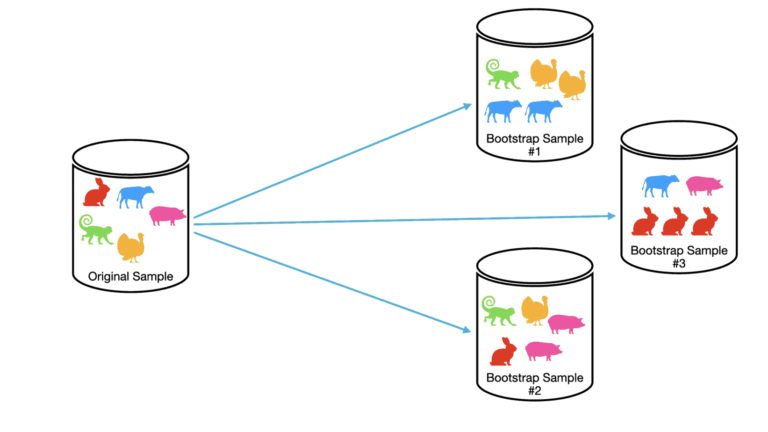

In [ ]:
for n in range(5):
    print(resample(churn_df.head()))

   tenure   age  address  income   ed  employ  equip  callcard  wireless  \
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   

   churn  
3      0  
4      0  
4      0  
0      1  
1      1  
   tenure   age  address  income   ed  employ  equip  callcard  wireless  \
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   

   churn  
3      0 

$ \ $

-----

## ***Select Variables at Random***

Like Bagging, RF uses an independent bootstrap sample from the training data. In addition, we select  $m$  variables at random out of all  $M$  possible variables. Let's do an example taking $M = 7$ y $m =3$.


In [ ]:
# creamos un frame apartir de churn_df y los rasgos mostrados
features = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']
X = churn_df[features]

# M es el numero de columnas de X o el numero de rasgos de X
M = X.shape[1]

# creamos  un objeto iterable con los numeros 0, 1, 2, ...., M-1
feature_index = range(M)

# realizamos una iteracion sobre el objeto iterable que tiene los numeros desde el 0 hasta el 4
for n in range(5):

  # tomamos una muestra aleatoria de 3 elementos del objeto iterable feature_index
  muestra = random.sample(feature_index, 3)

  # tomamos los 5 primeros renglones del dataframe X y tomamos 3 columnas (rasgos) aleatorias  
  data = X.iloc[0:5, muestra]

  # mostramos en pantalla el numero de muestra 
  print("\n", f"Sample ({n+1})")

  # aplicamos la funcion resample a data y mostramos el resultado en pantalla
  print(resample(data))


 Sample (1)
   address  employ  income
0      7.0     5.0   136.0
4     14.0    15.0    80.0
0      7.0     5.0   136.0
0      7.0     5.0   136.0
2      9.0     2.0    30.0

 Sample (2)
    age  equip  employ
4  35.0    0.0    15.0
3  35.0    1.0    10.0
1  33.0    0.0     0.0
0  33.0    0.0     5.0
2  30.0    0.0     2.0

 Sample (3)
   employ  tenure   age
1     0.0    33.0  33.0
4    15.0     7.0  35.0
3    10.0    38.0  35.0
0     5.0    11.0  33.0
4    15.0     7.0  35.0

 Sample (4)
    age   ed  employ
4  35.0  2.0    15.0
4  35.0  2.0    15.0
1  33.0  2.0     0.0
1  33.0  2.0     0.0
1  33.0  2.0     0.0

 Sample (5)
   employ   ed  equip
2     2.0  1.0    0.0
4    15.0  2.0    0.0
4    15.0  2.0    0.0
4    15.0  2.0    0.0
2     2.0  1.0    0.0



In Random Forest, we would use these data subsets to train each node of a tree.

$ \ $

----

## ***Train/Test dataset***

$ \ $

$(1)$ Let's define $X$ and $y$ for our dataset.

In [ ]:
# creamos un frame apartir de churn_df y los rasgos mostrados
features = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']
X = churn_df[features]

# creamos la data objetivo
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

$ \ $ 

$(2)$ We split our dataset into train and test set.

In [ ]:
# separamos nuestra data en data de prueba (30%) y data de entrenamiento (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
 
# mostramos los tamaños de la data de entrenamiento tanto de X como de y
print('Train set :', X_train.shape,  y_train.shape)

# mostramos los tamaños de la data de prueba tanto de X como de y
print('Test set: ', X_test.shape,  y_test.shape)

Train set : (140, 7) (140,)
Test set:  (60, 7) (60,)


$ \ $

----

## ***Bagging  Review***

$ \ $

Bagging improves models that suffer from overfitting (they do well on the training data, but they do not Generalize well). Decision Trees are a prime candidate for this reason, in addition, they are fast to train.

$ \ $

$(1)$ We create a <code>BaggingClassifier</code> object,  with a Decision Tree as the <code>estimator</code>.





In [ ]:
# creamos un arbol clasificador con una profundidad maxima de 4
est = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 2)

# creamos un objeto de tipo BaggingClassifier con el arbol clasificador como el estimador 
Bag = BaggingClassifier(estimator = est, n_estimators = 20, random_state = 0, bootstrap = True)

$ \ $

$(2)$ We fit the model.

In [ ]:
Bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=4,
                                                   random_state=2),
                  n_estimators=20, random_state=0)

$ \ $

$(3)$ We see the training accuracy is slightly better but the test accuracy improves dramatically.


In [ ]:
get_accuracy(X_train, X_test, y_train, y_test,  Bag)

{'test Accuracy': 0.7333333333333333, 'train Accuracy': 0.9071428571428571}

$ \ $

$(4)$ Each tree is similar. We can see this by plotting the correlation between each tree and the average correlation.

In [ ]:
corr = get_correlation(X_test, y_test, Bag)
corr.style.background_gradient(cmap = 'coolwarm')

Average correlation between predictors:  0.3040067153747236 



,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,-0.057709,0.152641,0.132379,0.068323,0.195047,0.209679,0.256111,0.177811,0.318511,-0.024845,0.318511,0.209679,0.112611,0.294475,-0.035245,0.161491,0.161491,0.236433,0.015456
estimator 2,-0.057709,1.000000,-0.002979,0.335171,0.349647,0.121829,-0.078409,0.013546,0.180022,0.223814,0.451486,-0.074605,-0.078409,0.404443,0.246580,0.481571,0.044130,0.044130,0.215365,-0.059131
estimator 3,0.152641,-0.002979,1.000000,0.395985,-0.010903,0.342381,0.455239,0.674356,0.442603,0.359425,-0.092675,0.519170,0.552099,0.296511,0.324850,0.216541,0.561502,0.479730,0.415029,0.006783
estimator 4,0.132379,0.335171,0.395985,1.000000,0.456572,0.242393,0.436809,0.427623,0.417131,0.494783,0.051331,0.415618,0.340807,0.405843,0.224442,0.199294,0.375523,0.294475,0.445634,0.194960
estimator 5,0.068323,0.349647,-0.010903,0.456572,1.000000,0.362231,-0.011036,0.090878,0.002915,0.409514,0.347826,-0.045502,0.099322,0.434355,0.294475,0.387699,0.068323,0.161491,0.315244,-0.100465
estimator 6,0.195047,0.121829,0.342381,0.242393,0.362231,1.000000,0.198030,0.370625,0.183073,0.163299,0.195047,0.244949,0.198030,0.505181,0.605983,0.158114,0.529414,0.195047,0.494975,-0.069338
estimator 7,0.209679,-0.078409,0.455239,0.436809,-0.011036,0.198030,1.000000,0.474619,0.564524,0.404226,-0.121393,0.619813,0.738562,0.323942,0.148803,0.062622,0.540752,0.430394,0.140028,0.247156
estimator 8,0.256111,0.013546,0.674356,0.427623,0.090878,0.370625,0.474619,1.000000,0.546688,0.464008,-0.074355,0.625402,0.474619,0.256776,0.283884,0.140642,0.669193,0.503960,0.454257,0.020559
estimator 9,0.177811,0.180022,0.442603,0.417131,0.002915,0.183073,0.564524,0.546688,1.000000,0.405727,-0.084533,0.491144,0.357359,0.241594,0.188913,0.314275,0.352707,0.177811,0.332877,0.079790
estimator 10,0.318511,0.223814,0.359425,0.494783,0.409514,0.163299,0.404226,0.464008,0.405727,1.000000,0.318511,0.466667,0.404226,0.392837,0.178122,0.464758,0.318511,0.318511,0.500370,0.113228


It can be shown that this correlation reduces performance. Random forest minimizes the correlation between trees, improving results.

$ \ $

----

## ***Random  Forest***

$ \ $

$\color{aquamarine}{\text{Random forests}}$ are a combination of trees such that each tree depends on a random subset of the features and data. As a result, each tree in the forest is different and usually performs better than Bagging. The most important parameters are the number of trees and the number of features to sample. Like Bagging, increasing the number of trees improves results and does not lead to overfitting in most cases; but the improvements plateau (meseta de mejoras) as you add more trees. 

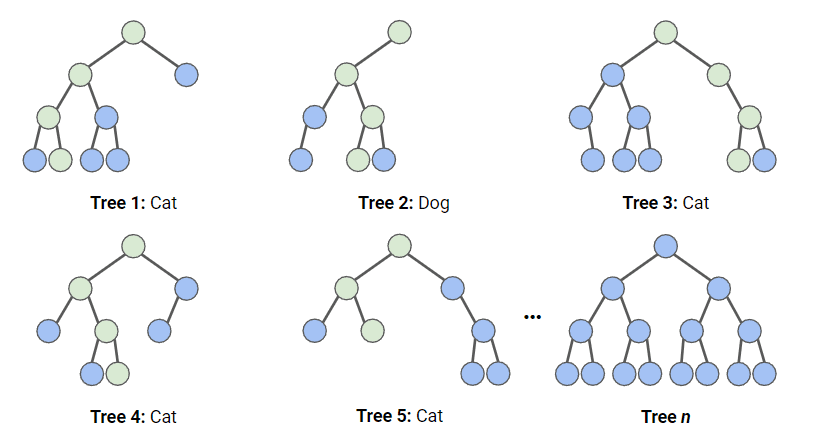

$ \ $

$(1)$ If we have $M$ - features, a popular method to determine $m$ is to take $m = floor(\sqrt{M})$. Using this, we create the RF object.

In [ ]:
def floor(x):
  y = round(x)
  p = y-x
  if p > 0.5:
    return y-1
  elif p <= 0.5:
    return y

In [ ]:
# determinamos el numero de columnas o rasgos del dataframe X
M = X.shape[1]

# usando la funcion piso, describimos el numero m
m = floor(np.sqrt(M))

# creamos un objeto de tipo RF
model = RandomForestClassifier(max_features = m, n_estimators = 20, random_state = 0)

$ \ $

$(2)$ We train the model.

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=20, random_state=0)

$ \ $

$(3)$ We obtain the training and testing accuracy; we see that RF does better than Bagging.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, model)

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.9928571428571429}

$ \ $

$(4)$ We see that each tree in RF is less correlated than Bagging.

In [ ]:
# usamos la funcion de correlacion para obtener la correlacion 
corr = get_correlation(X_test, y_test, model)

# mostramos un mapa de calor que describe la correlacion entre los rasgos
corr.style.background_gradient(cmap = 'coolwarm')

Average correlation between predictors:  0.27471931151729306 



,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,-0.043881,0.126504,0.229782,0.471558,0.229782,0.237661,0.229782,0.179825,-0.109989,-0.078306,0.306804,0.287563,0.076822,0.103429,-0.054729,0.076828,0.156640,0.272341,0.248659
estimator 2,-0.043881,1.000000,0.195924,0.175524,-0.048262,0.102389,0.123091,-0.043881,0.207870,-0.060398,0.248659,0.248659,0.317092,0.313803,0.314270,0.133631,0.225913,0.200024,0.041193,0.166667
estimator 3,0.126504,0.195924,1.000000,0.273887,0.132379,0.421270,0.454770,0.421270,0.231893,0.112841,0.200195,0.494962,0.341058,0.417428,0.573948,0.082285,0.395985,0.299735,0.348190,0.405843
estimator 4,0.229782,0.175524,0.273887,1.000000,0.386847,0.152760,0.399702,0.460847,0.101640,0.208052,0.306804,0.306804,0.605604,0.250759,0.434400,0.101640,0.374227,0.156640,0.344644,0.468064
estimator 5,0.471558,-0.048262,0.132379,0.386847,1.000000,0.471558,0.291090,0.217425,0.240772,0.090363,0.048003,0.386847,0.177811,-0.194490,0.227508,0.240772,0.316185,0.201981,0.233262,0.193047
estimator 6,0.229782,0.102389,0.421270,0.152760,0.471558,1.000000,0.399702,0.460847,0.492563,0.367073,-0.078306,0.383825,0.287563,0.163791,0.434400,0.258009,0.151178,0.156640,0.272341,0.175524
estimator 7,0.237661,0.123091,0.454770,0.399702,0.291090,0.399702,1.000000,0.399702,0.098693,0.122670,-0.086422,0.399702,0.540862,0.231759,0.435194,0.098693,0.245058,0.318182,0.537469,0.353888
estimator 8,0.229782,-0.043881,0.421270,0.460847,0.217425,0.460847,0.399702,1.000000,0.258009,0.128542,0.075738,0.460847,0.446583,0.250759,0.434400,0.023455,0.225528,0.318682,0.416947,0.614335
estimator 9,0.179825,0.207870,0.231893,0.101640,0.240772,0.492563,0.098693,0.258009,1.000000,0.153351,0.023455,0.258009,0.153351,0.185391,0.209980,0.126984,0.105661,0.180937,0.234863,0.133631
estimator 10,-0.109989,-0.060398,0.112841,0.208052,0.090363,0.367073,0.122670,0.128542,0.153351,1.000000,0.208052,-0.189500,0.097127,0.207987,0.064062,-0.008071,0.289099,-0.128246,0.047271,0.241594


$ \ $

----

## ***Cancer Data Example***

$ \ $

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)
[http://mlearn.ics.uci.edu/MLRepository.html](http://mlearn.ics.uci.edu/MLRepository.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01). The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. 

$ \ $

$(1)$ Let's load the dataset.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


$ \ $ 

$(2)$ Now let's remove rows that have a ***?*** in the <code>BareNuc</code>column.


In [ ]:
# pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()

In [ ]:
# creamos una serie de True - False la cual nos dice cuando un coeficiente es numerico y cuando no
num_data = pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()

# usando la serie como mascara, eliminamos los renglones que estan determinados como False
df = df[num_data]

$ \ $

$(3)$ We obtain the features and the class labels.

In [ ]:
# describimos los rasgos del dataframe
features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
X =  df[features]

# descrividos la data objetivo 
y = df['Class']

$ \ $

$(4)$ We split the data into training and testing sets.

In [ ]:
# separamos nuestra data en data de prueba (20%) y data de entrenamiento (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
# mostramos como fue separada la data de entrenamiento y la data de prueba
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


$ \ $

$(5)$ We create a <code>RandomForestClassifier</code> object and list the parameters using the method <code>get_params()</code>.

In [ ]:
# creamos el clasificador aleatorio de bosques
model = RandomForestClassifier()

#  obtenemos los parametros del clasificador aleatorio
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

$ \ $

$(6)$ We can use GridSearch for Exhaustive search over specified parameter values. We see many of the parameters are similar to Classification trees; let's try a different parameter for <code>max_depth</code>, <code>max_features</code> and <code>n_estimators</code>.


In [ ]:
# [2*n+1 for n in range(20)] = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
# [2*n+1 for n in range(10) ]  = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
param_grid = {'n_estimators': [2*n+1 for n in range(20)], 'max_depth' : [2*n+1 for n in range(10) ], 'max_features': ["auto", "sqrt", "log2"]}

# creamos un objeto de tipo grid search
search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy')

# entrenamos el objeto creado
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

$ \ $

$(7)$ We can see the best accuracy score of the searched parameters was ~77%.

In [ ]:
search.best_score_

0.9798999165971644

$ \ $

$(8)$ The best parameter values are.

In [ ]:
search.best_params_

{'max_depth': 13, 'max_features': 'auto', 'n_estimators': 39}

$ \ $

$(9)$ We can calculate accuracy on the test data using the test data.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_)

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 1.0}

$ \ $

----

## ***Practice***

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications:

* Drug A, 

* Drug B, 

* Drug C, 

* Drug x,

* Drug y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The $\color{aquamarine}{\text{features}}$ of this dataset are:

* $\color{aquamarine}{\text{Age}}$, 

* $\color{aquamarine}{\text{Sex}}$, 

* $\color{aquamarine}{\text{Blood Pressure}}$,

* $\color{aquamarine}{\text{Cholesterol of the patients}}$,

and the $\color{yellow}{\text{target}}$ is

*  $\color{yellow}{\text{the drug}}$ that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

$ \ $

$(1)$ Let's load the dataset.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


$ \ $

$(2)$  We obtain the features and the class labels.

In [ ]:
# describimos los rasgos del dataframe
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X =  df[features].values

# descrividos la data objetivo 
y = df["Drug"]

$ \ $

$(3)$ Now lets use a <code>LabelEncoder</code> to turn categorical features into numerical.



In [ ]:
# las columnas 1, 2 y 3 son cadenas de palabras
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [ ]:
# creamos un codificador de etiquetas
label_sex = preprocessing.LabelEncoder()

# entrenamos nuestro modelo con los datos 'F' = 'female' and 'M' = 'male'
label_sex.fit(['F','M'])

LabelEncoder()

In [ ]:
# creamos otro codificador de etiquetas
label_BP = preprocessing.LabelEncoder()

# entrenamos nuestro modelo con los datos 'LOW', 'NORMAL', 'HIGH'
label_BP.fit(['LOW', 'NORMAL', 'HIGH'])

LabelEncoder()

In [ ]:
# creamos otro codificador de etiquetas
label_Chol = preprocessing.LabelEncoder()

# entrenamos nuestro modelo con los datos 'NORMAL', 'HIGH'
label_Chol.fit(['NORMAL', 'HIGH'])

LabelEncoder()

In [ ]:
# obtenemos un conjunto de datos X ----> T(X) 
# basicamente label_sex funciona como una transformacion o una funcion
X[:, 1] = label_sex.transform(X[:, 1]) 

# obtenemos un conjunto de datos X ----> T(X) 
# basicamente label_sex funciona como una transformacion o una funcion
X[:, 2] = label_BP.transform(X[:, 2])

# obtenemos un conjunto de datos X ----> T(X) 
# basicamente label_sex funciona como una transformacion o una funcion
X[:, 3] = label_Chol.transform(X[:, 3]) 

In [ ]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

$ \ $

$(4)$ Split the data into training and testing data with a 80/20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
# mostramos los taaños de la data de entrenamiento y la data de prueba
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


$ \ $

$(5)$ We can use GridSearch for Exhaustive search over specified parameter values.

In [ ]:
# describimos los parametros de la red
# [2*n+1 for n in range(20)] = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
# [2*n+1 for n in range(10)] = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
param_grid = {'n_estimators': [2*n+1 for n in range(20)], 'max_depth' : [2*n+1 for n in range(10)], 'max_features': ["auto", "sqrt", "log2"]}


# creamos un objeto de tipo RandomForestClassifier
model = RandomForestClassifier()            

$ \ $

$(6)$ Create <code>GridSearchCV</code> object called search with:

* `estimator` = <code>model</code>,

*  <code>param_grid</code> = <code>param_grid</code>, 

* <code>scoring</code> = <code>accuracy</code>, 

* <code>cv</code> set to 3 

and Fit the <code>GridSearchCV</code> object to our <code>X_train</code> and <code>y_train</code> data.


In [ ]:
# creamos el objeto GridSearchCV con los parametros establecidos
search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = 3)

# entrenamos nuestro objeto
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

$ \ $

$(7)$ We can find the accuracy of the best model.


In [ ]:
search.best_score_

1.0

$ \ $

$(8)$ We can find the best parameter values.

In [ ]:
search.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 27}